In [ ]:
# @title `setup`
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import scipy.optimize as opt

from fractions import Fraction

### Introduction

Bayesianism is a theory of reasoning about uncertainty using the tools of Probability. A «radical» perspective that says only statistical methods, coherent with Probability's axioms, should be used to correctly apply the scientific method.

Given the scientific method's inductive nature, Bayesianism is an inductive theory of knowledge. An induction-based epistemology using the formal deductive methods of Probability Theory to integrate new evidence.

<!--
In Bayesianism, a probability is interpreted as a measure of relative plausibility. There is no need for the concept of repeatability, common in the frequentist perspective, there is no limit frequency to consider. Saying, for example, that an event as probability $0.75$ of happening just means that, accordingly to the model's assumptions, the event has odds $3\!:\!1$ in favor of happening.
-->

The fundamental process in Bayesianism is modelling an hypothesis $H$ by a probability distribution $p(H)$ -- known as the prior -- that can be updated after receiving new evidence $E$, resulting into a new probability distribution $p(H\mid E)$ -- known as the posterior -- which incorporates the knowledge contained in $E$.

Bayesianism provides a well-founded method to evaluate how evidence $E$ affects hypothesis $H$ via Bayes' Theorem.

$$p(H\mid E) = \frac{p(E\mid H)\cdot p(H)}{p(E)}$$

For this update to be possible we need a model for the data, given the hypothesis, which is called the likelihood distribution, $p(E \mid H)$. A valid hypothesis must be able to assign some positive probability to the current evidence, otherwise $p(H\mid E)$ would be zero.

After the update, if the posterior probability is greater (smaller) than the prior probability, relative to an alternative hypothesis $H'$, then evidence $E$ supports (opposes) hypothesis $H$ wrt $H'$.

The resulting posterior distribution $p(H\mid E)$ assigns probabilistic mass over all possible answers. The posterior is more than just a statistic like the mean, the mode, or a confidence interval. In practice, our information about the problem is incomplete, the evidence we collect is imperfect and noisy. It makes sense to express this uncertainty in the result we compute. The resulting distribution _is_ the uncertainty that is left after our initial assumptions are updated with the available evidence.

With the posterior we have access to all information required to answer questions and make decisions. In this sense, goals like parameter estimation, hypothesis testing, statistical inference, or decision making, are just different tasks that can be solved by analysing the posterior.

The distribution of evidence $E$, $P(E)$, required to perform the Bayesian model update, can be stated by the Law of total probability as

$$p(E) = p(E\mid H) \cdot p(H) + p(E\mid \overline{H})\cdot p(\overline{H})$$

or, with an hypothesis partition $\{H_1, H_2, \ldots, H_k\}$, as

$$p(E) = \sum_{i=1}^k p(E\mid H_k) \cdot p(H_k)$$

<!-- Distribution $p(E)$ is the probability of the evidence, which is the marginalization over all hypothesis, $p(E) = \int p(E,H) dH$ -->

<center>* * *</center>

Just as a reminder for the following sections, the two major rules to manipulate probabilities are

+ The sum rule,

$$p(X) = \sum_i p(X,Y_i)$$where $\{Y_1, \ldots, Y_n\}$ is a partition of the sample space

+ The product rule,

$$p(X,Y) = p(X) \cdot p(Y \mid X)$$

<center>* * *</center>

A brief historical note. The History of early Bayesianism goes back to the origins of Probability as a mathematical concept arguably from James Bernoulli's seminal book _Art of Conjecture_ of 1713, until the work of Thomas Bayes in the 1760s$ ^{(*)}$.

Only with the research of Pierre-Simon Laplace, in the early 1800s, we find the first coherent use of Probability as a method for solving scientific problems, collected in his _Philosophical Essay on Probabilities_ of 1825. In 1837 De Morgan calls Laplace's method as _Inverse Probability_, a term that stuck for more than a century.

Inverse Probability was the statistical method used until late 19th, early 20th century when the works of Francis Galton, Karl Pearson and, a generation afterwards, Ronald Fisher, Egon Pearson and Jerzy Neyman created a new Statistics later known as Frequentism. This new body of work became the _de facto_ standard of statistical work that lasts until today. It was Fisher that first coined (pejoratively) the term «Bayesian» around 1950, a time when the classical methods were already quite obscure.

Inverse Probability was kept alive by the works of people like Harold Jeffreys, de Finetti, I.J. Good, and E.T. Jaynes, until the advent of computational methods in the 1970s and 1980s -- especially the Metropolis algorithm -- which resulted in the resurgence of Bayesianism we witness nowadays.

> <font size="-1"> (*) for the History of Probability, before the 1700s, check James Franklin's _The Science of Conjecture_. A more pop-history book about Bayesianism is Sharon McGrayne's _The Theory That Would Not Die_. Another interesting book is _Bernoulli's Fallacy_ by Aubrey Clayton.</font>



---



### Codifying Previous Knowledge

A Bayesian must codify previous knowledge about the selected problem into its probabilistic model, thus defining the model's priors. This is not an insurmountable restriction to satisfy. All scientific research problems have pre-data knowledge to explore and model, otherwise they would not be studied (we would know nothing about them). Context is key. The researcher should acknowledge that, and use it in her favor.

There are two central objects to codify this knowledge:

+ the prior distribution $p(H)$ about the hypothesis' parameters

+ the likelihood distribution $p(E\mid H)$ about how evidence is generated, conditional to the hypothesis

The likelihood distribution is not provided by the empirical distribution of the available evidence, but by our knowledge about how that evidence might be generated, accordingly to the chosen hypothesis. It is a model of the data, the data's prior distribution.

Notice that when the model states that $E$ is normally distributed, that does not imply that $E$ really is generated by a normal process. It just means that we decided to quantify our uncertainty about the evidence using a normal distribution.

Also notice that, despite the fact there are [many](https://en.wikipedia.org/wiki/List_of_probability_distributions) well-studied distributions in Statistics, it does not mean your current problem must follow one of them. Sometimes a truncated version is needed, or a mixture of distributions, or even totally new distributions tailor-made to the problem.

<center>* * *</center>

Frequentism assumes, in its critique of Bayesianism, that only the prior is subjectively chosen, but that is not true. Both distributions are subjectively decided by the researcher, based on what part of her knowledge she chooses to include on the probabilistic model.

At least in part to answer these critiques, there has been much research about building uninformative priors that claim not to have an impact over the update process. This means priors that does not transmit information, that model ignorance about the problem. I think this is a sociological problem, not an epistemological one, that derives from considering objectivity as something ideal to approach. This position assumes that «the data [can] speak for themselves», which it cannot. There is the need to insert contextual information about the problem, and that is provided by  adequate prior distributions.

If $p(\theta)$ was completely detached from the evidence, $p(\theta)$ and $p(E)$ would be independent,

$$p(\theta\mid E) = \frac{p(E \mid \theta)\cdot p(\theta)}{p(E)} = \frac{p(E,  \theta)}{p(E)} = \frac{p(E) \cdot p(\theta)}{p(E)} = p(\theta)$$

meaning no update would occur after considering the evidence.

As Brendon J. Brewer said:

> _The goal isn't objectivity but rather transparency. Don't claim you're making no assumptions. Instead, clearly communicate what the assumptions are._

Also a quote from Elea McDonnell Feit:

> _It is true that prior distributions often reflect subjective beliefs, but then again, so do many other aspects of the research paradigm, including measurement, sampling, data cleaning, and model specification. «Subjective» need not mean «arbitrary»._

<center>* * *</center>

Another counter-argument is that there is no essential difference between priors and likelihoods, it all depends on modelling decisions.

Consider the following example [from [1](https://plausibilitytheory.wordpress.com/2013/12/05/the-prior-isnt-the-only-prior/)]:

We wish to estimate the mean of noisy iid data $x = \{x_1, x_2, \ldots, x_n \}$, with a parameter $\theta$, with a (subjectively chosen) normal likelihood $x_i \sim \mathcal{N}(\theta,1)$.

To compute posterior $p(\theta \mid x)$ we need a prior for $\theta$. Let's use here the improper prior $p(\theta) = 1$. The posterior [then](https://www.youtube.com/watch?v=c8EJ35b-T6U) becomes $\theta\!\mid\!x \sim \mathcal{N}(\overline{x},1/\sqrt{n})$.

This is a standard model approach to this type of problem.



But let's restate the problem by considering errors $\epsilon_i = x_i - \theta$ as model parameters. Let $\epsilon = \{\epsilon_1, \ldots, \epsilon_n \}$.

The posterior $p(\theta, \epsilon \mid x)$ is, by Bayes' theorem, proportional to $p(x\mid \theta, \epsilon) p(\theta) p(\epsilon)$, since $\theta \perp \epsilon$.

Again we chose the improper prior for $p(\theta)$, and replace the «normality assumption» of $x$ by priors $\epsilon_i \sim \mathcal{N}(0,1)$.

Now, if we knew $\theta$ and $\epsilon_i$, then $x_i$ would be just a fixed number, the sum of this two parameters, $x_i = \theta + \epsilon_i$. Its distribution becomes a [Dirac delta](https://en.wikipedia.org/wiki/Dirac_delta_function):

$$p(x \mid \theta, \epsilon) = \prod_{i=1}^n \delta[x_i - (\theta + \epsilon_i)]$$

The posterior is:

$$p(\theta, \epsilon \mid x)\propto p(\theta) p(\epsilon) p(x \mid \theta, \epsilon) \propto \prod_{i=1}^n \exp(-\frac{1}{2}\epsilon_i^2) \cdot \delta[x_i - (\theta + \epsilon_i)]$$


To compute the posterior $p(\theta \mid x)$ we need to marginalize the errors $\epsilon$ (lots of integrals...). The result would be,

$$p(\theta \mid x) \propto \exp\big[-\frac{1}{2} \sum_{i=1}^n (\theta-x_i)^2 \big]$$

which, and after some algebraic manipulation, results again in $\theta\!\mid\!x \sim \mathcal{N}(\overline{x},1/\sqrt{n})$.

Notice how, in this second approach, the normal likelihood for data $x$ became a normal prior for parameters $\epsilon$.

Bayes' theorem is like the [honey badger](https://www.youtube.com/watch?v=4r7wHMg5Yjg), it simply doesn't care!



---



### Probability at 1 or 0

Hypothesis are not completely proved or refuted in Bayesianism -- as it should be in Science --, they are assigned a probability between $]0,1[$. A probability of zero implies infinite opposing evidence, as well as a probability of one implies infinite supporting evidence.

What would happen if $p(H)$ is zero? The only way to update the hypothesis is via Bayes theorem, by calculating $p(E\mid H)\cdot p(H)$. But, no matter the likelihood of the new evidence, $p(E\mid H)$, this product would always be zero since $p(H)=0$, so given any evidence $E$, $p(H \mid E)=0$. This means that an hypothesis once considered impossible, we remain impossible _no matter the amount of supporting evidence that appears afterwards_. This is not a reasonable position, epistemologically speaking.

And what would happen if $p(H)$ is one?

By the Law of total probability, $$p(E) = p(E\mid H) \cdot p(H) + p(E\mid \overline{H})\cdot p(\overline{H})$$

If $p(H)=1$ then $p(\overline{H})=0$ which means,

$$\begin{equation} \begin{split}
p(E) & = p(E\mid H) \cdot p(H) + p(E\mid \overline{H})\cdot 0   \\
     & = p(E\mid H) \cdot p(H)
\end{split}\end{equation}$$

So, $$p(H|E) = \frac{p(E\mid H)\cdot p(H)}{p(E)} = \frac{p(E\mid H)\cdot p(H)}{p(E\mid H) \cdot p(H)} = 1$$

Again, no matter the opposing evidence $E$, a certain hypothesis will remain certain. Again, not a reasonable position. We should always be open to question any hypothesis, no matter the previous amount of supporting evidence. Especially if there's new, and mounting, opposing evidence.

If a model, given its assumptions, assigns probabilities zero or one to certain outcomes, that means any contradictory outcome will automatically refute the model. Falsifability is a good property for a model to have, of course. The problem here is that the model will not allow the Bayesian calculus to function over evidence that questions its assumptions.

The model's assumptions are also a consequence of more general scientific models, from which the former is build from. For example, a biological model works under the assumptions stated by Natural Selection. Under Natural Selection some kinds of evidence are considered impossible.

All scientific models rely on many levels of assumptions. There are always background information, mathematical and physical structures defined by standard scientific theories, that any new model is based upon.

It is important to understand which assumptions are epistemologically justified (due to contextual knowledge or by the problem's specifications), and which are not (like incoherent assumptions inserted to allow analytical solutions, or ideological ones due to social pressure).



---



### Likelihood and Model Comparison

Likelihood is a measure of how surprising the evidence is, assuming a certain model/hypothesis. Here we consider the likelihood as the probability distribution $p(E \mid H)$, and not use the classical setting $\mathcal{L}(H \mid E)$ which is proportional to $p(E \mid H)$. Likelihood is a model of the data, given the hypothesis; it is a conditional prior on the data.

There are two principles related to likelihood that guide statistical inference,

> **The Likelihood Principle**: given a statistical model, all evidence relevant to the model parameters is contained in the likelihood function.

> **The Law of Likelihood**: within the framework of a statistical model, a particular set of data _supports_ one statistical hypothesis better than another if the likelihood of the first hypothesis, on the data, exceeds the likelihood of the second hypothesis. ref: _A.W. Edwards, Likelihood (1992)_

In the remainder of this section the chosen hypothesis is denoted as $\mathcal{M}$, the probabilistic model representing the hypothesis.

The likelihood value $p(E | \mathcal{M})$ has no meaning in isolation. These particular values are only useful in comparison with the likelihoods of all available models.

An example. Consider $x=6$ heads were measured after $n=10$ coin flips.

If $X$ is the random variable measuring the number of heads after ten flips, its distribution is $X \sim \text{Binom}(10, \theta)$.

Let's consider two distinct models $\mathcal{M_1}$ and $\mathcal{M_2}$ defined as

$$\mathcal{M_1}: \theta = 0.5$$

$$\mathcal{M_2}: \theta = 0.65$$

where $\mathcal{M_1}$ is a model of a fair coin, and $\mathcal{M_2}$ a model of a bent coin.

For either model, the likelihood is

$$p(n=10,x=6 \mid \mathcal{M_i}) =  {10 \choose 6} \theta^6 (1-\theta)^4$$

To measure how much the evidence favors one model or another, we divide the likelihoods, which is called a **Bayes factor**:

$$\text{Bayes Factor} = \frac{P(n,x \mid {\cal M}_2)}{P(n,x\mid{\cal M}_1)}$$

In [ ]:
from math import comb

lik_binom = lambda θ: lambda n,x: comb(n,x) * θ**x * (1-θ)**(n-x)

lik_M1 = lik_binom(θ=0.5)
lik_M2 = lik_binom(θ=0.65)

n, x = 10, 6
lik_M2(n,x)/lik_M1(n,x)

1.1589168409

We interpret this number as saying that the evidence is $1.59$ times more probable under the model of the bent coin.

This result is sensitive to the amount of data we have. Let's consider ten times more data:

In [ ]:
n, x = 100, 60    # 60 heads after 100 coin flips
lik_M2(n,x)/lik_M1(n,x)

4.370415612848329

Now the bent coin model is $4.37$ times more probable than the fair model!

This formalises the idea that it is a good practice to collect more evidence in order to properly choose between models.

Notice that nothing is being said if either model is a good fit for the data.

First, we did not specify a criteria for what means to be a good fit.

Second, if we choose the MLE estimate for $\theta$, let's call it $\mathcal{M_0}$, and compare with our best model $\mathcal{M_2}$, we notice that $\mathcal{M_2}$ is getting more and more unsuitable to explain the evidence:

In [ ]:
lik_M0 = lik_binom(θ=x/n)

n, x = 10, 6
print(lik_M2(n,x)/lik_M0(n,x))

n, x = 100, 60
print(lik_M2(n,x)/lik_M0(n,x))

n, x = 1000, 600
print(lik_M2(n,x)/lik_M0(n,x))

0.9475559207964661
0.583510259587947
0.00457598892251242


Model comparison is precisely that, comparing available models wrt available data using the likelihood concept. We cannot measure if a model absolutely supports some evidence. This can only be done relatively, by comparing how surprising is the evidence between two or more models.

Even saying that a model weakly or strongly supports the evidence only makes sense in the context of alternative models.

If we have prior preferences for our model (called prior odds) we can used Bayes Factor to update our preferences (called posterior odds):

$$\underbrace{ \frac{P({\cal M}_1\mid y)}{P({\cal M}_0\mid y)} }_{\text{posterior odds}} = \underbrace{ \frac{P(y \mid {\cal M}_1)}{P(y\mid{\cal M}_0)} }_{\text{Bayes Factor}} \times\underbrace{\frac{P({\cal M}_1)}{P({\cal M}_0)}}_{\text{prior odds}}$$

Model comparison is a critical task in the scientific method. It is how we assess new explanations of natural phenomena, compare them with older models, improve them in the dialectic process of Science.

A final note. Some critiques say that Bayesian model selection is based on the **closed world assumption**, which means a statement that is true is also known to be true. In our context, it means that one of the models we are comparing is considered true.

Firstly, models are never true. They can be more or less adequate, more or less useful to the problem we need to solve

Secondly, model comparison compares a set of chosen models, it can never compare an infinite number of models (unless, perhaps, if they share some continuous parametrization). Each individual model can be almost perfect, or almost useless, in explaining or in predicting some phenomena. That is irrelevant. What is provided is the relative strenghts of the models in question. A researcher can always remove the worst models from the analysis.



---



### Bayesian Update as Information Compression

Everytime the prior distribution of the hypothesis $p(H)$ needs to be updated by some evidence $E$, we compute the posterior $p(H\mid E)$ via Bayes' theorem.

How much information has been gained? Or, how much we learned from this evidence?

The way to answer is using the notion of **relative entropy**, also known as [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) or just KL-divergence, which is a measure of difference between two distributions $P,Q$.

The relative entropy from $Q$ to $P$ is,

$$D_{KL}(P\mid\mid Q) = \int_x P(x) \log{\frac{P(x)}{Q(x)}} dx$$

> KL-divergence is not a metric, since usually $D_{KL}(P\mid\mid Q) \neq D_{KL}(Q\mid\mid P)$.

The information gained by updating the prior with evidence $E$ is then $D_{KL}(p(H\!\mid\! E)\mid\mid p(H))$.

The next code computes the information gain for a beta-binomial probabilistic model:

In [ ]:
xs = np.linspace(0.001, 0.999, num=1000) # discrete set of values over ]0,1[

# beta-binomial conjugate, cf. https://en.wikipedia.org/wiki/Conjugate_prior
α, β = 1, 1
prior = ss.beta.pdf(xs, α, β)

successes, failures = 25, 5 # evidence
posterior = ss.beta.pdf(xs, α+successes, β+failures)

information_gain = ss.entropy(posterior, prior, base=2)
print(f'The information gain by the evidence was {information_gain:.2f} bits.')

The information gain by the evidence was 1.87 bits.


Everytime a new posterior is computed, entropy gets removed, since every new posterior encodes progressively more information.

In [ ]:
print(f'Prior entropy: {ss.entropy(prior):.3f}')
print(f'Posterior entropy: {ss.entropy(posterior):.3f}')

Prior entropy: 6.908
Posterior entropy: 5.609


The posterior's entropy considers all parameters (the previous example had just one dimension).

For example, if we are fitting a linear model $y_i = m x_i + b$ there are two parameters which must be considered to calculate the information gain and the entropy.

But if we wish to consider just the informational gain of, say, parameter $m$, we can do it by marginalizing $b$,

$$p(m\mid E) = \int p(m,b \mid E) ~ db$$

Bayes' theorem has an informational perspective: the posterior distribution is just one of an infinite set of distributions that aggregates the information from the prior and the evidence, but it is the one _with the highest possible entropy_.

In other words, Bayes' theorem maps the prior knowledge to a posterior knowledge that is maximally uncertain under the restrictions of the new evidence, i.e., it does not restrict or assume anything non-related to the evidence.

<center>* * *</center>

A subject that intersects Bayesianism and Information Theory is the **principle of maximum entropy**:

> The most appropriate distribution to model our prior knowledge about a problem is the one with highest entropy among all those that satisfy the constrains of our prior knowledge.

There is a connection between the concept of maximum entropy (maxent) and many umbiquous distributions. Some examples:

+ The uniform is the maxent distribution when we only know that valid values are within an interval

+ The normal distribution is the maxent with support $(−\infty,+\infty)$ when we only know the mean and variance

+ The exponential distribution is the maxent with support $[0,+\infty)$ when we only know the mean

Maxent states that the prior's uncertainty should be maximized subject _only_ to the information we have. Every extra assumption removes valued entropy and will degrade the inference step, since it closes possible instantiations due to these assumption's unnecessary restrictions.



---



### Randomness as Ignorance

In Bayesianism, randomness is not a property of objects or processes. If a fair coin is flipped, there is nothing in the coin that breaks causality and generates randomness. We might model the coin flip as random because the physical details are too complicated to properly estimate a result with odds other than 1:1. Saying that something is «random» is an abuse of language, since it expresses nothing else than a modelling decision to express ignorance.

Randomness is, at most, a tool of model building. Nothing is considered as inherently random. The word itself has frequentist connotations. It is preferred to speak of uncertainty which is a measure of our current knowledge about the problem.

A related, and well-known, heuristic is **the principle of indifference**, stating that in the absence of any relevant evidence, the probabilistic mass should be equally distributed among the outcomes of the sampling space. This is an extreme position, since almost no problem is in this category, except toy problems with balls, cards, or coins. When a problem says that some ball was selected «at random», it is implicitly using this principle.

The [principle of maximum entropy](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy) is a generalization of this idea. The use of [exponential distributions](https://en.wikipedia.org/wiki/Exponential_family) for priors and likelihoods can be justified because these distributions are the result of maximizing the target distribution's entropy restricted to what is known.

Also, the assumptions of independence used in modelling parameters, or iid data samples, are also a way to express ignorance over correlation details that might be known but are too hard to model and/or compute. Models are simplifications of reality, and many compromises must necessarily be taken. However, each purposeful expression of ignorance one makes is an intentional action to remove information from the inference process.



---



### The Base Rate Fallacy

MLE is a standard tool to estimate model parameters. However, in certain extreme situations, it can fail badly. It is susceptible to what is known as the **base rate fallacy**, which is the tendency to ignore relevant statistical information in favor of case-specific information. Since Bayesianism has the option of including relevant information into the prior and likelihood, it can avoid this statistical trap.

Let's check an example:

> A constant Poissonian light source emits photons at an average rate of $100$ per second. The photons strike a detector with $10\%$ efficiency. In one particular second, the detector registers $15$ counts. What is the expectation for the number of photons actually emitted in that second? [ref](https://maximum-entropy-blog.blogspot.com/2012/04/fly-papers-and-photon-detectors-another.html)

Let $n$ be the number of emissions, $s$ the average rate, $c$ the number of detected photons, and $\phi$ the detector efficiency.

Since $n$ follows a Poisson given $s$,

$$p(n \mid s) = e^{-s} \frac{s^n}{n!}$$

The likelihood of the data, the actual count $c$, is modelled by a binomial,

$$p(c\mid n \phi) = {n \choose c} \phi^c (1-\phi)^{n-c}$$

where $\phi=0.1$ and $c=15$.

The maximum likelihood estimation tell us to choose $n$ as to maximize this likelihood.

In Python:

In [ ]:
import scipy.optimize as opt
from scipy.special import comb

ϕ, c = 0.1, 15
f = lambda n: - comb(n,c) * (1-ϕ)**(n-c)  # ϕ**c is a constant
n = opt.minimize(f, x0=[2*c], bounds=((c,None),)).x[0]

print(f'The MLE estimation of n ≈ {n:.1f}')

The MLE estimation of n ≈ 149.5


The optimization result is near the true MLE for $n$, which is $150$.

Let's check this result by Monte Carlo the problem:

In [ ]:
def emissions(n_trials, ϕ=0.1, s=100, c=15):
  # keep emissions only when we have 'c' detected photos
  return [n for n in ss.poisson.rvs(s, size=n_trials)
            if sum(ss.uniform.rvs(size=n) <= ϕ) == c]

ns = emissions(50_000)
print(f'Estimation of n ≈ {np.mean(ns):.2f}')

Estimation of n ≈ 105.19


The value for the MLE is widely out of mark of the simulation result (spoiler: it is not the simulation that is wrong).

The reason is that the number of $150$ emissions is a very rare event, and MLE is not able to consider the remaining context from where the values are extracted.

Via Bayes' theorem:

$$p(n|c\phi s) = \frac{p(c\mid n\phi s)\cdot p(n \mid \phi s)}{p(c\mid \phi s)}$$

we can simplify the expression by removing the irrelevant conditional parameters

$$p(n|c\phi s) = \frac{p(c\mid n\phi)\cdot p(n \mid s)}{p(c\mid \phi s)}$$

where the likelihood and the prior were already defined above.

The evidence is also a Poisson,

$$p(c\mid \phi s) = e^{-s\phi} \frac{(s\phi)^c}{c!}$$

Combining these distributions we get again a Poisson:

$$p(n \mid c \phi s) = e^{-s(1-\phi)} \frac{[s(1-\phi)]^{(n-c)}}{(n-c)!}$$

The mean of this poisson is $s(1-\phi)$ shifted by $c$ (since we cannot have less emitted photos than the ones detected). This is $100 \times 0.9 + 15 = 105$ matching the Monte Carlo simulation.

Indeed, using the Bayesian method is usually harder than just using MLE but, as someone as said, thinking is usually harder.



---



### Nuisance Parameters

A **nuisance parameter** is any unspecified parameter that must be accounted for in the model, if we wish to produce a required answer.

To illustrate the concept, let's consider and solve the following problem:

> Suppose that, in a survey of 1000 people in a state, 400 say they voted in a recent primary election. Actually, though, the voter turnout was only 30%. Give an estimate of the probability that a nonvoter will falsely state that he or she voted. (Assume that all voters honestly report that they voted.) [ref](https://maximum-entropy-blog.blogspot.com/2012/05/nuisance-parameters.html)

We can guesstimate the answer by just counting:

In [ ]:
n_people   = 1000
say_voted  = 400
voters     = 300
non_voters = n_people - voters

Fraction(say_voted - voters, non_voters)

Fraction(1, 7)

So, $\hat{\theta} = 1/7$.

Let's estimate this value using the laws of probability.

Denoting $V$ as a given person voted, and $Y$ that he reported himself has a voter.

Let's use the product rule:

$$p(Y \overline{V}) = p(\overline{V}) \cdot p(Y \mid \overline{V})$$

together with the Law of Large Numbers:

$$p(Y\overline{V}) \approx 0.1$$

Since, given a voter turnout of $30\%$, that is $p(V)=0.3$, in $1000$ votes it is expected that $300$ persons voted. So approximately $100$ non-voters lied.

Doing the calculations:

In [ ]:
p_V     = Fraction(3, 10)
p_noV   = 1 - p_V
p_Y_noV = Fraction(1, 10)

p_Y_given_noV = Fraction(p_Y_noV, p_noV)
p_Y_given_noV

Fraction(1, 7)

Again we have $\hat{\theta} = 1/7$.

But these estimates hide much uncertainty. We don't know how wide is the uncertainty around the exact number of voters and non-voters.

Consider a second version of the problem:

> Suppose that, in a survey of 1000 people in a state, 400 say they voted in a recent primary election. Actually, though, the voter turnout was only 30%. Give a *95\% credible interval* for the probability that a nonvoter will falsely state that he or she voted. (Assume that all voters honestly report that they voted.)

To answer this version we need to compute a distribution over the rate $\theta$ of liars.

In this case, we cannot directly compute $\theta$ since we don't know how many liars, or non-voters, were in the survey. Let's denote $n$ as the number of non-voters. The value $n$ is of no use for answering the original question, but is needed in the model. This is what is called a nuisance parameter.

We need to compute the joint probability $p(\theta n \mid E)$.

By the product rule,

$$p(\theta n \mid E) = p(\theta \mid n E) \cdot p(n \mid E)$$

with:

$$p(n \mid E) \sim \text{Binom}(1000, 0.7)$$

$$p(\theta \mid n E) \sim \text{Beta}(n-600,600)$$

Parameter $\theta$ is modelled by a Beta$(\alpha,\beta)$ where $\alpha=600-n$ is the number of non-voting liars, and $\beta=600$ is the number of truthful non-voters, as stated by the problem.

<!--
$$p(\theta n \mid E) = \frac{p(E \mid \theta n)\cdot p(\theta n | E)}{p(E)}$$
-->

If we are able to find the joint distribution, we can then compute the desired $p(\theta)$ by **marginalizing** out $n$,

$$p(\theta \mid E) = \sum_n p(\theta n \mid E)$$

The next Python code computes the joint probability $p(\theta n \mid E)$ using a grid calculation:

In [ ]:
truthful_non_voters = n_people - say_voted

# finding p(n|E)
liars        = np.arange(0, say_voted+1) # max number of liars is 400
non_voters   = truthful_non_voters + liars
p_non_voters = ss.binom.pmf(non_voters, n_people, float(p_noV))

# finding p(θ|nE)
def p_θ_given_n(θ, n):
  """ returns an approximation of probability mass at [θ, θ+δ] """
  return δ * ss.beta.pdf(θ, n-truthful_non_voters+1, truthful_non_voters+1)

# finding p(θn|E) by grid computing
size_grid = 500
δ = 1/size_grid
θs = np.linspace(0, 1, num=size_grid)

joint = np.zeros((len(p_non_voters), size_grid))
for i, p_n in enumerate(p_non_voters):
  for j, θ in enumerate(θs):
    joint[i,j] = p_n * p_θ_given_n(θ, i+truthful_non_voters)

`joint` is a matrix of joint probabilities where position $(i,j)$ represents $p(\theta_j, n_i\mid E)$, $600 \leq n_i \leq 1000$, and $\theta_j = j \delta$.

To marginalize out parameter $n$, we sum all columns,

$$p(\theta_j \mid E) = \sum_i p(\theta_j, n_i\mid E)$$

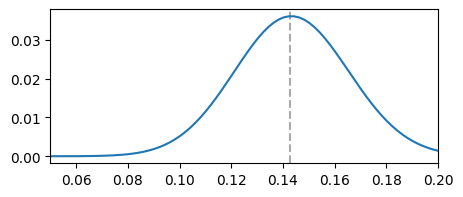

In [ ]:
p_θ = np.sum(joint, axis=0) # marginalizing parameter 'n' out

plt.subplots(figsize=(5,2))
plt.axvline(x=1/7, color='#aaaaaa', linestyle='--') # x=1/7
plt.xlim(0.05, 0.2)
plt.plot(θs, p_θ);

With the distribution $p(\theta\mid E)$ we have access to more information and can evaluate how uncertain is the estimation $\hat{\theta} = 1/7$.

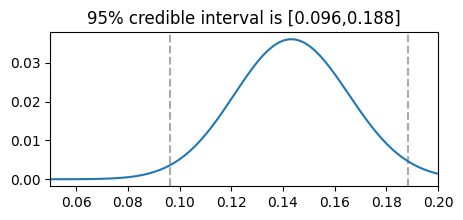

In [ ]:
def credible(dist, mass): # TODO: surely, there are better ways to do this
  # find mode
  idx_mode = max(enumerate(dist), key=lambda t: t[1][1])[0]
  # expand interval (assuming symmetry)
  i, current_mass = 1, dist[idx_mode][1]
  while current_mass < mass:
    current_mass += dist[idx_mode-i][1] + dist[idx_mode+i][1]
    i += 1
  return dist[idx_mode-i][0], dist[idx_mode+i][0]

plt.subplots(figsize=(5,2))
x_min, x_max = credible(list(zip(θs, p_θ)), 0.95)
plt.axvline(x=x_min, color='#aaaaaa', linestyle='--')
plt.axvline(x=x_max, color='#aaaaaa', linestyle='--')
plt.title(f'95% credible interval is [{x_min:.3f},{x_max:.3f}]')
plt.xlim(0.05, 0.2)
plt.plot(θs, p_θ);



---



### Ockham's Razor

[Ockham's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) is the epistemological principle that, given two models that explain equally well the evidence, the simpler one should be chosen.

Here the definition of simplicity is wrt how easy the model can be falsified. In the context of probability this means that a simpler model should concentrate its probability mass is a smaller region of its domain.

The more concentrated the distribution is, the easier is to find evidence outside the probable region and, thus, the easier it is to falsify it -- in the sense of model comparison, that means one of the other models should be preferred. On the other hand, if the evidence agrees with the simpler model, this model will be compensated, since it assigns an higher likelihood to what was measured.

Simplicity, in these terms, correlates to the number of parameters a model has.

A more complex model has more parameters. More parameters provides flexibility for the model to «explain» evidence (to give it more likelihood). More parameters make more observations consistent with the model, its sampling distribution is wider.

Since any distribution has a total mass of one, widening the space of explainable evidence comes at the cost of reducing likelihood overall. A complex model risks less than a simple model and, thus, is harder to falsify.

On the limit, a model that explains equally well all values in its support, is not falsifiable. Everything is expected, there is no evidence that surprises it. As Laplace sarcastically answered Lagrange and Napoleon about the God's hypothesis. _«Monsieur Lagrange has, with his usual sagacity, put his finger on the precise difficulty with the hypothesis: it explains everything, but predicts nothing.»_. Another humorous take by Jeremy Freese describes these theories as _«more vampirical than empirical — unable to be killed by mere evidence»_.

<center>* * *</center>

Consider the next [example](https://quasar.as.utexas.edu/papers/ockham.pdf) by E.T. Jaynes and J. Berger:

> _The example concerns the comparison of competing theories of gravity in the 1920s: Einstein's relativity, which we denote by proposition E, and a fudged Newtonian theory, N, in which the inverse-square dependence on distance is allowed instead to become_ $d^{-(2+\epsilon)}$, _where_ $\epsilon$ _is some small fudge factor. This was a genuine controversy at that time, with some respected theorists refusing to accept relativity._
>
> _The evidence we wish to use to judge these models is the observed anomalous motion of the orbit of Mercury, seen to differ from ordinary Newtonian mechanics by an amount, a = 41.6" ± 2.0" seconds of arc per century. The value, α, calculated for this deviation using E was 42.9", a very satisfying result, but we will use our objective methodology to ascertain whether in light of this evidence, E is more probably the truth than N, the fudged Newtonian model._ [ref](https://maximum-entropy-blog.blogspot.com/2012/07/ockhams-razor.html)

Using relativity, the likelihood for the measure $a$ is normally distributed with mean $42.9$. Taking the same standard deviation $\sigma=2$ from the measure,

$$p(a \mid E) \sim \mathcal{N}(42.9, 2.0)$$

The fudge Newtonian model needs an extra parameter $\epsilon$,

$$p(a,\epsilon \mid N) = p(a \mid \epsilon N) \cdot p(\epsilon \mid N)$$

where $\epsilon$ is a nuisance parameter and which can be marginalized:

$$p(a \mid N) = \int p(a \mid \epsilon N) \cdot p(\epsilon \mid N) ~ d\epsilon$$

From observations of other planets, it was known that $\epsilon \leq 100$. And, since the fudge theory said nothing about the signal of $\epsilon$, we model it with a normal at zero and standard deviation $\tau = 50$,

$$p(\epsilon \mid N) \sim \mathcal{N}(0, 50.0)$$

The paper gives the analytical solution for $p(a|N)$,

$$p(a|N) = \frac{1}{\sqrt{2\pi (\sigma^2+\tau^2)}} \exp \Big( -\frac{a^2}{2(\sigma^2+\tau^2)} \Big)$$

In [ ]:
from math import pi, exp

def lik_einstein(a, σ=2):
  return ss.norm.pdf(a, 42.9, σ)

def lik_newton2(a, σ=2, τ=50):
  s = σ**2 + τ**2
  return (1/(2*pi*s)**.5)* np.exp(-a**2 / (2*s))

Let's consider that we don't favor either model before seeing the data

In [ ]:
pre_einstein, pre_newton2 = 0.5, 0.5 # equal prior odds

What happens if we update the models with evidence $a=41.6$?

In [ ]:
a = 41.6

prior_odds   = pre_einstein / pre_newton2
bayes_factor = lik_einstein(a) / lik_newton2(a)

posterior_odds = bayes_factor * prior_odds
posterior_odds

28.61652336351509

The actual measure makes Relativity $28.6$ times more credible than the fudged Newton model.

Why is that? The fudge model is more complex. The extra parameter $\epsilon$ is able to explain a greater interval of possible measures. Relativity takes more risks, it concentrates its mass around a narrower interval of measures. Relativity is easier to falsify, and given the result actually measured, it reaps the odds in its favor.

Let's plot both likelihoods to visualize this:

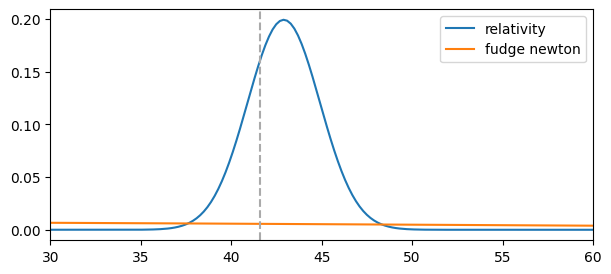

In [ ]:
a = 41.6
xs = np.linspace(0, 100, num=500)

plt.subplots(figsize=(7,3))
plt.xlim(30, 60)
plt.plot(xs, lik_einstein(xs))
plt.plot(xs, lik_newton2(xs))
plt.axvline(x=a, color='#aaaaaa', linestyle='--') # the real measure
plt.legend(['relativity', 'fudge newton']);

Notice if the angle was smaller, say $a=35.6$, the fudge model would be vindicated (at least in comparison with Relativity),

In [ ]:
a = 35.6

prior_odds   = pre_einstein / pre_newton2
bayes_factor = lik_einstein(a) / lik_newton2(a)

posterior_odds = bayes_factor * prior_odds
posterior_odds

24.252209382697103

The fudge model would be $24.3$ times more credible.

We can plot at what angles which model would be favored:

In [ ]:
def p_evidence(a):
  return (lik_einstein(a) * pre_einstein +
          lik_newton2(a)  * pre_newton2)

def post_einstein(a):
  return lik_einstein(a) * pre_einstein / p_evidence(a)

def post_newton2(a):
  return lik_newton2(a)  * pre_newton2  / p_evidence(a)

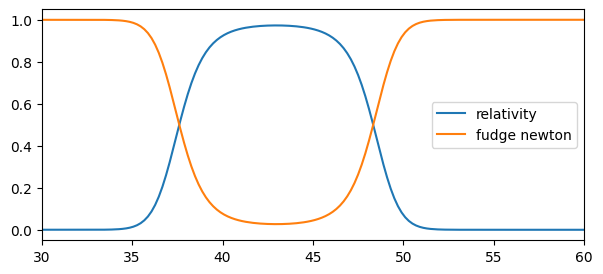

In [ ]:
plt.subplots(figsize=(7,3))
plt.xlim(30, 60)
plt.plot(xs, post_einstein(xs))
plt.plot(xs, post_newton2(xs))
plt.legend(['relativity', 'fudge newton']);

Ockham's razor is a fuzzy heuristic that was given a formal meaning, and is implicitly built, in Bayesianism.



---



### Prediction

It is often depicted as the difference between Statistics and Machine Learning (ML), that Statistics are more concerned with explaining phenomena, while ML is more concerned with predicting phenomena.

Statistical models try to map a part of reality,  its parameters refer to something tangible within that reality and are, thus, directly interpretable. ML models are usually ready-made black-boxes flexible enough to allow precise predictions. Their cost, especially in more complex models like neural networks, is lack of interpretability.

In a way this is a consequence of their academic backgrounds and original goals. Statistics methods were designed as scientific tools and, without surprise, they are widely used in Science. Machine Learning -- as a branch of Artificial Intelligence -- focused more on engineering problems, which naturally found their niche in Business (cf. [Statistical Modeling: The Two Cultures](https://projecteuclid.org/journals/statistical-science/volume-16/issue-3) by Leo Breiman).

However, it is perfectly possible to deal with prediction in a Bayesian setting.

Consider we wish to predict the probability of a future value $y$, with parameters $\theta$ representing the current model knowledge. The *predictive distribution* is the distribution of possible unobserved values conditional on the evidence of observed values. We can compute the predictive distribution by integrating out the model parameters,

$$p(y \mid E) = \int_\theta p(y \theta \mid E) ~ d\theta = \int_\theta p(y \mid \theta)\cdot p(\theta \mid E) ~ d\theta$$

which means the expected probability of $y$ over all parameters $\theta$ must be averaged by the probabilities of those parameters within the model.

If this calculation is done with $p(\theta)$ -- so, no new evidence was considered -- it is called the **prior predictive distribution**, and if done with $p(\theta\mid E)$ it is called the **posterior predictive distribution**.

This is a frequent Bayesian tecnique: if you don't know something, but are able to compute a joint probability with another parameter, consider the latter a nuisance parameter and marginalize it out.

Notice that if the predictive distribution was calculated as $p(y \mid \hat{\theta})$, where $\hat{\theta}$ is the best estimate available, the result would be too certain of itself (its credible intervals would be too narrow), since it would not account for the uncertainty of the parameters.

<center>* * *</center>

Let's check the following example ([ref](https://www.amazon.com/dp/B00CEN4YE4), pgs.2,30):

> Suppose we are going to start to monitor mortality rates for a high-risk operation in a new hospital. Experience in other hospitals indicates that the risk θ for each patient is expected to be around 10%, and it would be fairly surprising (all else being equal) if it were less than 3% or more than 20%.
>
> Suppose our hospital was going to do 20 operations next year.
>
> 1. How many deaths might we expect, and
>
> 1. What is the chance there will be at least six deaths?

The probability of death $\theta$ is going to be modelled by a Beta distribution.

Let's assume that the probabilistic mass of non-surprising results is $90\%$, i.e., $90\%$ of probability mass is between quantiles $0.03$ and $0.2$. We can then infer the beta parameters via optimization:

In [ ]:
def beta_parameters(qs, ps):
  """ Find parameters for beta rv X st P(X ≤ qᵢ)=pᵢ
      ref: https://www.codeproject.com/Articles/56371/Finding-Probability-Distribution-Parameters-from-P """
  def objective(x):
    costs = [ss.beta.cdf(qᵢ, x[0], x[1]) - pᵢ for qᵢ, pᵢ in zip(qs, ps)]
    return sum(cost*cost for cost in costs)

  xopt = opt.fmin(objective, x0=[1,1], disp=False)
  return xopt[0], xopt[1]

α, β = beta_parameters([0.03, 0.2], [0.05, 0.95])
α, β

(3.1341142571496063, 28.07522915067676)

So the prior for $\theta$ is, $$p(\theta) \sim \text{Beta}(3.13, 28.07)$$

The likelihood, since data are counts, is going to be a binomial. Let's denote $Y$ as the number of deaths for $20$ operations,

$$Y \sim \text{Binomial}(\theta, 20)$$

Let's use a MCMC tool, we chose module `pymc`, to compute a sampling for the posterior distribution $p(\theta \mid Y)$,

In [ ]:
import pymc as pm
import arviz as az

def model(α, β):
  with pm.Model() as model:
    theta = pm.Beta("theta", alpha=α, beta=β) # prior
    y     = pm.Binomial("y", n=20, p=theta)   # likelihood
  return model

In [ ]:
hospital_model = model(α, β)

with hospital_model:
  idata = pm.sample(draws=20_000)

Bayes' theorem directly calculates $p(\theta | E)$ but here we want to predict a value for $Y$.

To do that we need to consider $\theta$ as the nuisance parameter and marginalize it out. Fortunately, the MCMC chains for each parameter are already a sampling from the parameters' marginalization,

In [ ]:
post_y = np.array(idata.posterior['y']).reshape(-1)

Let's visualize it as an histogram,

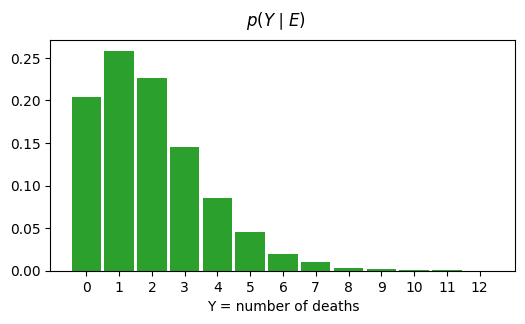

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
fig.suptitle(r'$p(Y \mid E)$')
ax.set_xlabel(r'Y = number of deaths')
az.plot_dist(post_y, color="C2");

The posterior gives the entire distribution over the first question «How many deaths might we expect?».

We can summarize by answering with the mean or with, say, a $95\%$ credible interval,

In [ ]:
print(f'We expect {np.mean(post_y):.2f} number of deaths')

summary = az.summary(idata, hdi_prob=0.95, kind="stats").loc['y']
print(f'With 95% credibility, the maximum expected number of deaths is {summary[3]:.0f}.')

We expect 1.95 number of deaths
With 95% credibility, the maximum expected number of deaths is 5.


Finally, for the second question «What is the chance there will be at least six deaths?», we just find the proportion of values higher or equal to six:

In [ ]:
print(f'The probability for six or more deaths is {np.mean(post_y >= 6):.1%}')

The probability for six or more deaths is 3.5%




---



### Decision

In Bayesianism, decision-making is based on the model's posterior distribution, just like estimation or prediction.

<center>* * *</center>

In other areas, like Machine Learning, there is an overlap between inference and decision, that makes it easier to blur these diferent steps.

A classification algorithm, like a logistic regression or using neural networks, is a decision-making procedure. But it is also an inference procedure. The problem with this standard approach is that there is no option for the user to choose a risk (utility) function to minimize (maximize). Many classification procedures, like logistic regression, are defined by their specific loss function.

Also, by reducing the decision process to a discrete outcome, too much information might be compressed. Perhaps the estimate passes the threshold of acceptance, but what about the uncertainty around it? Some problems have high signal ratio, others have high noise ratio, and these differences are important to make decisions. There are several levels of certainty around a «Yes» or a «No», and some decisions imply too much risk to accept or reject blindly. Sometimes a discrete response is not able to properly answer this type of concerns.

Also, classifiers [do not work well](https://stats.stackexchange.com/a/574621/37322) with very low prevalence data, i.e., with very unbalanced datasets.

It's not surprising that ML algorithms are used in the context of large quantities of information, pushing the [signal-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) to high positive decibels, thus minimizing, even nullifying, these issues.

<center>* * *</center>

Bayesianism updates prior information with evidence to provide a posterior distribution. That's where the _inference problem_ stops.

The posterior does not include what action we should perform if there are several options to consider. To act, to decide, we require extra information and that's where the _decision problem_ begins.

To build a decision problem we need to know:

+ what are the possible **states**, $s \in S$, and their probability

+ what are the possible **actions**, $a \in A$

+ a **loss function**, $L(s,a)$ giving the loss of performing action $a$ if the *true state* is state $s$

This next example come from Stuart Coles:

> _There is a new vaccination plan against the flu. It is estimated that 60% of the entire population is immune to this flu strand. People with flu will miss work which means that there's a work loss for society (cost 20 units), but there's also a cost to vaccinate an already immune person (cost 8 units). We assume that there's a negligible cost of vaccinate a non immune person and also not vaccinating an immune one. The decision problem is that, without any individual information, should we vaccinate one person?_

The possible states are $S = \{s_1, s_2\}$, where $s_1$ means immune individual, and $s_2$ means vulnerable person. Notice that we don't know the person's status, if we knew then this would have a trivial solution. We only know the $60\%$ initial estimate, ie, $p(s_1)=0.6$ and $p(s_2)=0.4$. This was done at the inference step (probably this distribution was found after a random sampling from the entire population).

The possible actions are $A=\{a_1, a_2\}$, where $a_1$ means 'vaccinate' and $a_2$ means 'not vaccinate'.

The loss function is

$$
\begin{array}{c|cc}
L(s,a) & s_1 & s_2\\
\hline
a_1 & 8 & 0 \\
a_2 & 0 & 20  \\
\end{array}
$$

The best decision is the one that minimizes the (prior) expected loss $E_S[L(s,a)] = \sum_s L(s,a) p(s)$:

In [ ]:
all_states   = np.array([1, 2])     # s1, s2
prior_states = np.array([0.6, 0.4]) # p(s1), p(s2)

def loss(state, action):
  return np.array([[ 8,  0],
                   [ 0, 20]])[action-1, state-1]

assert loss(state=2, action=2) == 20

# expected loss of vaccination
cost_vaccinate = sum(loss(action=1, state=all_states) * prior_states)
print(f'cost of vaccinate a random person: {cost_vaccinate}')

# expected loss of non vaccination
cost_not_vaccinate = sum(loss(action=2, state=all_states) * prior_states)
print(f'cost of vaccinate a random person: {cost_not_vaccinate}')

cost of vaccinate a random person: 4.8
cost of vaccinate a random person: 8.0


So the loss of not vaccinating is larger than vaccinating. The decision then is to vaccinate each individual person.

This decision might change if more evidence $E$ is provided. In this case we should go back to the inference step and remake the distribution over the known states to compute $p(s_i|E)$ before computing and minimize the new loss values.

Continuing with the vaccine eg, say that we have a cheap but not entirely reliable test for flu vulnerability that provides the values $x_1,x_2,x_3,x_4$ ($x_1$ meaning negligible response to $x_4$ meaning strong response) with the following joint probability distribution:

$$
\begin{array}{c|cc}
& p(x_i|s_1) & p(x_i|s_2) \\
\hline
x_1 & 0.35 & 0.09 \\
x_2 & 0.30 & 0.17  \\
x_3 & 0.21 & 0.25  \\
x_4 & 0.14 & 0.49  \\
\end{array}
$$

Given the prior information regarding $E$, $p(s_i)$, and datum $x_i$, we use the conditional table for $p(x_i|E)$ with Bayes' theorem to compute $p(s_i|x_i)$.

In [ ]:
likelihood_x_states = np.array([[.35, .09],
                                [.30, .17],
                                [.21, .25],
                                [.14, .49]])

def posterior(prior, likelihood, given_state, given_data):
  evidence = sum(likelihood[given_data, all_states-1] * prior )
  return prior[given_state] * likelihood[given_data, given_state] / evidence

posterior_states = np.zeros((4,2))
for xi in range(4):
  for si in range(2):
    posterior_states[xi,si] = posterior(prior_states, likelihood_x_states, si, xi)

print(f'{"s1":>13} {"s2":>5}')
for i in range(1,5):
  print(f'p(S|x{i}) {posterior_states[i-1,0]:.3f} {posterior_states[i-1,1]:.3f}')

           s1    s2
p(S|x1) 0.854 0.146
p(S|x2) 0.726 0.274
p(S|x3) 0.558 0.442
p(S|x4) 0.300 0.700


Again the inference problem is over: we have the posterior for the states given the data.

To be able to find the best decision, we first compute the posterior expected loss,

$$\rho(a,x_i) = E_{S|x_i}[L(s,a)] = \sum_s L(s,a) p(s\!\mid\!x_i)$$

In [ ]:
expected_loss = np.zeros((4,2))

for xi in range(4):
  for ai in range(2):
    expected_loss[xi, ai] = sum(loss(action=ai+1, state=all_states) *
                                posterior_states[xi, all_states-1])
print(f'{"a1":>19} {"a2":>6}')
for i in range(1,5):
  print(f'E[L(S,a)|x{i}] {expected_loss[i-1,0]:6.3f} {expected_loss[i-1,1]:6.3f}')

                 a1     a2
E[L(S,a)|x1]  6.829  2.927
E[L(S,a)|x2]  5.806  5.484
E[L(S,a)|x3]  4.460  8.850
E[L(S,a)|x4]  2.400 14.000


In this case we see that the best action is not always vaccinate (action $a_1$ which is in the first column). We only should vaccinate if the test returns $x_3$ or $x_4$, ie, when the test returns strong responses of vulnerability.

Consider that we decide to implement policy $d$, given $x_i$, chooses action $a$ that minimizes the posterior expected loss:

$$d(x_i) = \arg\min_a \rho(a,x_i)$$

In [ ]:
def d(xi):
  return 1+np.argmin(expected_loss[xi,:])

print(f'For a x1 response after test, do action {d(1)}.')
print(f'For a x3 response after test, do action {d(3)}.')

For a x1 response after test, do action 2.
For a x3 response after test, do action 1.


We can compute the risk associated with a given policy $d(x)$ by averaging the losses across the uncertainty of each $x_i$. This expected loss is denoted as **Bayes risk**:

$$R(d) = \sum_i \rho(d(x_i), x_i) \cdot p(x_i)$$

<!--  = \sum_i L(d(x_i), x_i)\cdot p(s_i\!\mid\!x_i) -->

In [ ]:
# compute marginal probabilities p(xi)
marginals_x = likelihood_x_states @ prior_states

def bayes_risk(d): # function d is the policy chosen
  risk = 0
  for i in range(4):
    decision_i = d(i)-1
    decision_loss_i = expected_loss[i, decision_i]
    risk += decision_loss_i * marginals_x[i]
  return risk

print(f'Bayes Risk of policy d is {bayes_risk(d):.2f}')

Bayes Risk of policy d is 3.76


What is the risk associated with the policy of vaccinating everyone?

In [ ]:
everyone = lambda xi: 1  # always choose action 1

print(f'Bayes Risk of vaccinate everyone is {bayes_risk(everyone):.2f}')

Bayes Risk of vaccinate everyone is 4.80


And for the policy to not vaccinate everyone:

In [ ]:
no_one = lambda xi: 2   # always choose action 2

print(f'Bayes Risk of vaccinate everyone is {bayes_risk(no_one):.2f}')

Bayes Risk of vaccinate everyone is 8.00


Or the policy to first flip a coin to decide between actions $a_1$ and $a_2$ (let's simulate to estimate the mean risk):

In [ ]:
from random import random

flip_coin = lambda xi: random() < 0.5

risk = np.mean([bayes_risk(flip_coin) for _ in range(1000)])
print(f'Average Bayes Risk of flipping coin is {risk:.2f}')

Average Bayes Risk of flipping coin is 6.46


which is a better policy than universal non-vaccination.

<center>* * *</center>

One problem with deciding either with Bayes or with ML is that the distributions $p(s_i)$ and $p(x_i | s_i)$ are usually unknown. Instead what we have is an (assumedly) iid dataset $\mathcal{D} = \{(x_k, s_{xk}), k \in 1 \ldots n\}$.

Let's define the _empirical risk_

$$R_e(d) = \frac{1}{n} \sum_{k=1}^n L(s_{xk}, d(x_k))$$

as the average risk of applying a decision rule $d$ over all pairs of $\mathcal{D}$.

Given the iid assumption, it is expected that, as $n$ increases, $R_e(d)$ converges in probability with $R(d)$, the true but unknown Bayes risk.

The statistical strategy is to learn the probabilities $p(x|s)$ and $p(s)$ from $\mathcal{D}$ then estimate the best decision rule by minimizing the expected loss,

$$\hat{d} = \arg\min_d \rho(d(x), x)$$

<!-- This is called a generative method since we have access to the joint probability $p(x,s)$ which makes it possible to stochastically generate new data samples. This is allow us to compare how well the generated samples resembles the original data, which serves to validate the model. Also, generative models tend to be interpretable and useful in new domains. -->

The Machine Learning strategy is to estimate $\hat{d}$ directly from $R_e$.

Another strategy is learning the posterior $p(s|x)$ directly from $\mathcal{D}$. This is what we call regression.

### References

+ E.T. Jaynes - [The Logic of Science](https://www.amazon.com/dp/0521592712) (2003)

+ T. Campbell-Ricketts - [Maximum Entropy](https://maximum-entropy-blog.blogspot.com) blog (2012--2014)

+ B.J. Brewer - [Plausibility Theory](https://plausibilitytheory.wordpress.com) blog (2013--2015)

Suggested reading:

+ R. McElreath - [Statistical Rethinking](https://www.amazon.com/dp/036713991X) 2ed (2020)